<a href="https://colab.research.google.com/github/shreyab1111/CovidCTScanEnsemble/blob/main/CovidEnsemble2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""Ordn_pp_4ResNet_BP_ImgNt.ipynb
Automatically generated by Colaboratory.
Original file is located at
    https://colab.research.google.com/drive/1l27dlqT535IAQi9P8fltuRBn4msswm2V
"""

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install deepstack

In [3]:
import pandas as pd
import numpy as np 
import os
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import PReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [4]:
img_rows, img_cols = 300, 180 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)
batch_size=128
epochs=25
n_class=48

In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/CovidData/train/AllData/',
        classes = ['CovidData','NonCovidData'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/My Drive/CovidData/test/',
        classes = ['Covid','NonCovid'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

Found 2217 images belonging to 2 classes.
Found 264 images belonging to 2 classes.


In [6]:
base_model1 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model2 = tf.keras.applications.VGG16(weights='imagenet', include_top = False)
base_model3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top = False)

for layer in base_model1.layers:   layer.trainable = False
for layer in base_model2.layers:   layer.trainable = False
for layer in base_model3.layers:   layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [7]:
x = base_model1.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)
model1 = tf.keras.models.Model(inputs=base_model1.input, outputs=preds)

In [8]:
model1.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

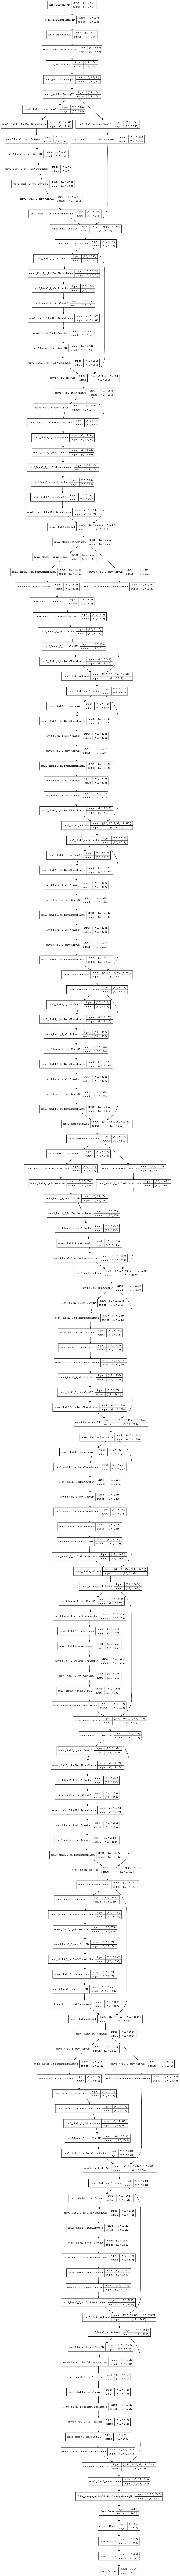

In [9]:
tf.keras.utils.plot_model(
    model1,
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
)

In [10]:
x = base_model2.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)
model2 = tf.keras.models.Model(inputs=base_model2.input, outputs=preds)

In [11]:
model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

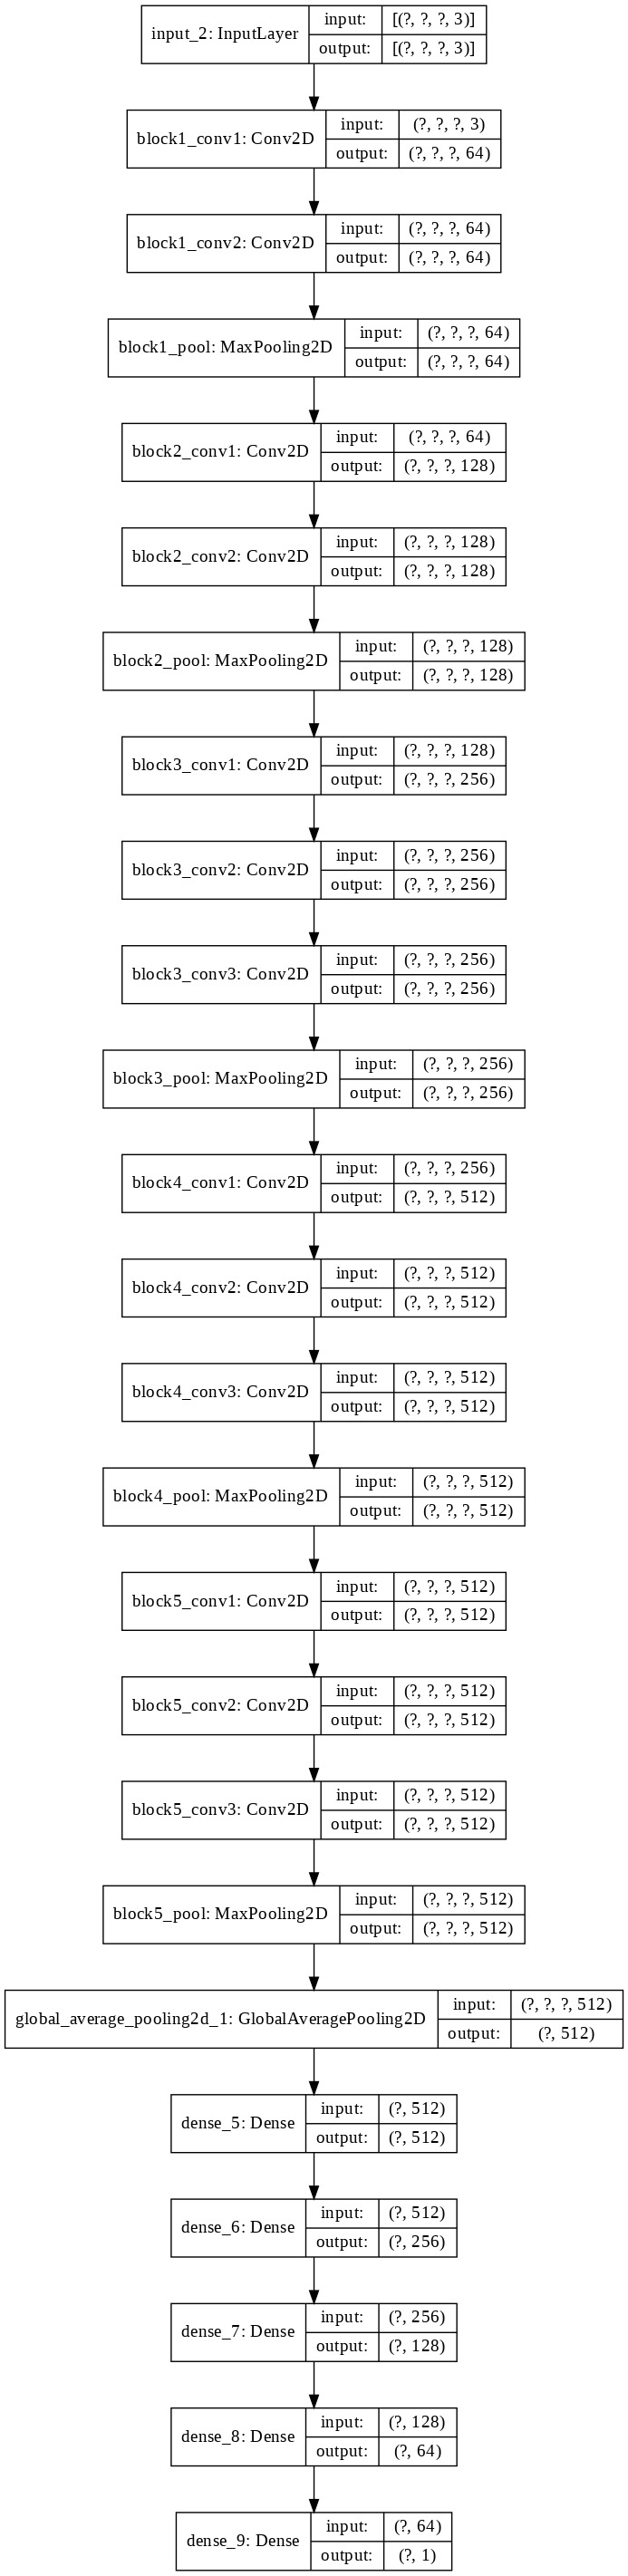

In [12]:
tf.keras.utils.plot_model(
    model2,
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
)

In [13]:
x = base_model3.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(126, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)
model3 = tf.keras.models.Model(inputs=base_model3.input, outputs=preds)

In [14]:
model3.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [15]:
tf.keras.utils.plot_model(
    model3,
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
)

In [16]:
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

cb1= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb2= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb3= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

In [17]:
history1 = model1.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=20,
      validation_data=valid_generator,callbacks=[cb1],
      validation_steps=5)

Epoch 1/20
69/69 [==============================] - 726s 11s/step - loss: 0.3443 - accuracy: 0.8476 - val_loss: 0.2253 - val_accuracy: 0.8750
Epoch 2/20
69/69 [==============================] - 32s 458ms/step - loss: 0.2078 - accuracy: 0.9085 - val_loss: 0.1201 - val_accuracy: 0.9312
Epoch 3/20
69/69 [==============================] - 19s 275ms/step - loss: 0.1702 - accuracy: 0.9263 - val_loss: 0.0628 - val_accuracy: 0.9750
Epoch 4/20
69/69 [==============================] - 16s 237ms/step - loss: 0.1431 - accuracy: 0.9410 - val_loss: 0.1712 - val_accuracy: 0.9438
Epoch 5/20
69/69 [==============================] - 16s 233ms/step - loss: 0.1275 - accuracy: 0.9455 - val_loss: 0.2388 - val_accuracy: 0.9062
Epoch 6/20
69/69 [==============================] - 15s 223ms/step - loss: 0.1306 - accuracy: 0.9487 - val_loss: 0.1782 - val_accuracy: 0.9312
Epoch 7/20
69/69 [==============================] - 15s 222ms/step - loss: 0.0890 - accuracy: 0.9616 - val_loss: 0.5056 - val_accuracy: 0.8562


In [18]:
history2 = model2.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=20,
      validation_data=valid_generator,callbacks=[cb1],
      validation_steps=5)

Epoch 1/20
69/69 [==============================] - 16s 233ms/step - loss: 0.3935 - accuracy: 0.8416 - val_loss: 0.1830 - val_accuracy: 0.9312
Epoch 2/20
69/69 [==============================] - 16s 225ms/step - loss: 0.1796 - accuracy: 0.9181 - val_loss: 0.1403 - val_accuracy: 0.9375
Epoch 3/20
69/69 [==============================] - 16s 226ms/step - loss: 0.1750 - accuracy: 0.9236 - val_loss: 0.0905 - val_accuracy: 0.9500
Epoch 4/20
69/69 [==============================] - 16s 226ms/step - loss: 0.1073 - accuracy: 0.9588 - val_loss: 0.0421 - val_accuracy: 0.9875
Epoch 5/20
69/69 [==============================] - 15s 224ms/step - loss: 0.0879 - accuracy: 0.9638 - val_loss: 0.1067 - val_accuracy: 0.9625
Epoch 6/20
69/69 [==============================] - 15s 224ms/step - loss: 0.0760 - accuracy: 0.9688 - val_loss: 0.0687 - val_accuracy: 0.9688
Epoch 7/20
69/69 [==============================] - 15s 223ms/step - loss: 0.0483 - accuracy: 0.9822 - val_loss: 0.0885 - val_accuracy: 0.9688

In [19]:
history3 = model3.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=20,
      validation_data=valid_generator,callbacks=[cb1],
      validation_steps=5)

Epoch 1/20
69/69 [==============================] - 16s 237ms/step - loss: 3.9889 - accuracy: 0.7254 - val_loss: 0.0207 - val_accuracy: 0.9937
Epoch 2/20
69/69 [==============================] - 15s 211ms/step - loss: 0.4048 - accuracy: 0.8261 - val_loss: 0.3572 - val_accuracy: 0.8250
Epoch 3/20
69/69 [==============================] - 15s 211ms/step - loss: 0.3542 - accuracy: 0.8508 - val_loss: 0.2717 - val_accuracy: 0.8750
Epoch 4/20
69/69 [==============================] - 15s 212ms/step - loss: 0.2663 - accuracy: 0.8801 - val_loss: 0.2161 - val_accuracy: 0.8875
Epoch 5/20
69/69 [==============================] - 15s 212ms/step - loss: 0.2922 - accuracy: 0.8636 - val_loss: 0.1149 - val_accuracy: 0.9500
Epoch 6/20
69/69 [==============================] - 15s 210ms/step - loss: 0.2670 - accuracy: 0.8764 - val_loss: 0.1374 - val_accuracy: 0.9312
Epoch 7/20
69/69 [==============================] - 15s 212ms/step - loss: 0.2561 - accuracy: 0.8865 - val_loss: 0.0580 - val_accuracy: 0.9937

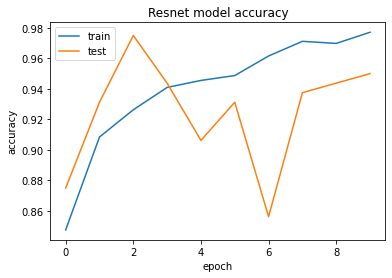

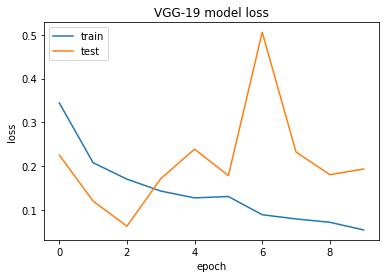

In [20]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Resnet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('VGG-19 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

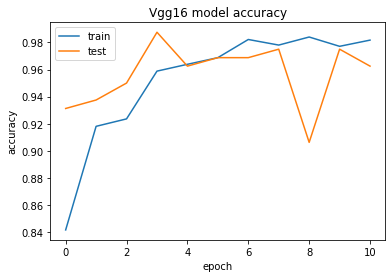

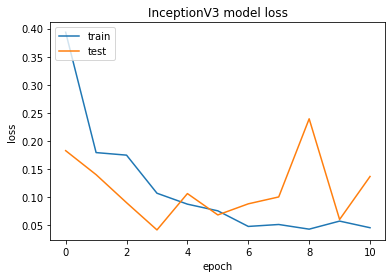

In [21]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Vgg16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('InceptionV3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

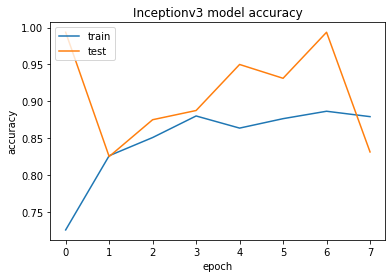

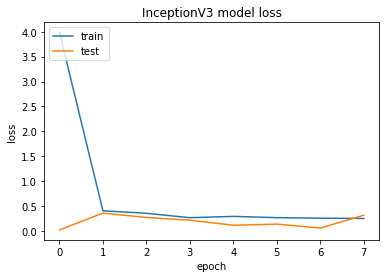

In [22]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Inceptionv3 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('InceptionV3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
from deepstack.base import KerasMember

member1 = KerasMember(name="model1", keras_model=model1, train_batches=train_generator, val_batches=valid_generator)
member2 = KerasMember(name="model2", keras_model=model2, train_batches=train_generator, val_batches=valid_generator)
member3 = KerasMember(name="model3", keras_model=model3, train_batches=train_generator, val_batches=valid_generator)

Instructions for updating:
Please use Model.predict, which supports generators.
9/9 [==============================] - 2s 199ms/step


In [27]:
from deepstack.ensemble import DirichletEnsemble
from sklearn.metrics import accuracy_score

wAvgEnsemble = DirichletEnsemble(N=10000, metric=accuracy_score)
wAvgEnsemble.add_members([member1, member2, member3])
wAvgEnsemble.fit()
wAvgEnsemble.describe()

model1 - Weight: 0.5182 - accuracy_score: 1.0000
model2 - Weight: 0.1425 - accuracy_score: 1.0000
model3 - Weight: 0.3393 - accuracy_score: 1.0000
DirichletEnsemble accuracy_score: 1.0000


In [28]:
from deepstack.ensemble import StackEnsemble
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

#Ensure you have the scikit-learn version >= 0.22 installed
print("sklearn version must be >= 0.22. You have:", sklearn.__version__)

stack = StackEnsemble()

# 2nd Level Meta-Learner
estimators = [
    ('rf', RandomForestClassifier(verbose=0, n_estimators=100, max_depth=15, n_jobs=20, min_samples_split=30)),
    ('etr', ExtraTreesClassifier(verbose=0, n_estimators=100, max_depth=10, n_jobs=20, min_samples_split=20)),
    ('dtc',DecisionTreeClassifier(random_state=0, max_depth=3))
]
# 3rd Level Meta-Learner
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

stack.model = clf
stack.add_members([member1, member2,member3])
stack.fit()
stack.describe(metric=sklearn.metrics.accuracy_score)

sklearn version must be >= 0.22. You have: 0.22.2.post1
Calling predict
model1 - accuracy_score: 1.0000
model2 - accuracy_score: 1.0000
model3 - accuracy_score: 1.0000
StackEnsemble accuracy_score: 0.9697


0.9696969696969697

In [29]:
stack.save()

<StackEnsemble: [model1, model2, model3]>

In [30]:
stack.load()

Loaded model2
Loaded model3
Loaded model1


<StackEnsemble: [model2, model3, model1]>